In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets, transforms

In [2]:
DATASET_PATH = "/home/heitor/USP/IC/FAPESP/code_dataset/dataset/Plant_leave_diseases_dataset_without_augmentation"

In [3]:
def get_label_mappings(data_dir):
    # Use a dummy transform since we just need the class names and indices
    transform = transforms.Compose([transforms.ToTensor()])
    
    # Load the dataset to access the class_to_idx attribute
    dataset = datasets.ImageFolder(data_dir, transform=transform)
    
    # Return the mapping
    # Return the reversed mapping
    return {v: k for k, v in dataset.class_to_idx.items()}

In [4]:
label_mappings = get_label_mappings(DATASET_PATH)

In [5]:
def save_scatter_plots(csv_path, label_mappings, fig_size=40):
    # Read df
    df = pd.read_csv(csv_path)
    plt.figure(figsize=(fig_size, fig_size))
    colors = plt.cm.rainbow(np.linspace(0, 1, len(df['pred'].unique())))

    for i, label in enumerate(sorted(df['pred'].unique())):
        subset = df[df['pred'] == label]
        class_name = label_mappings[int(label)]
        plt.scatter(subset['x'], subset['y'], color=colors[i], label=class_name)
    
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Scatter plot of predicted labels')
    plt.show()
    plt.close()

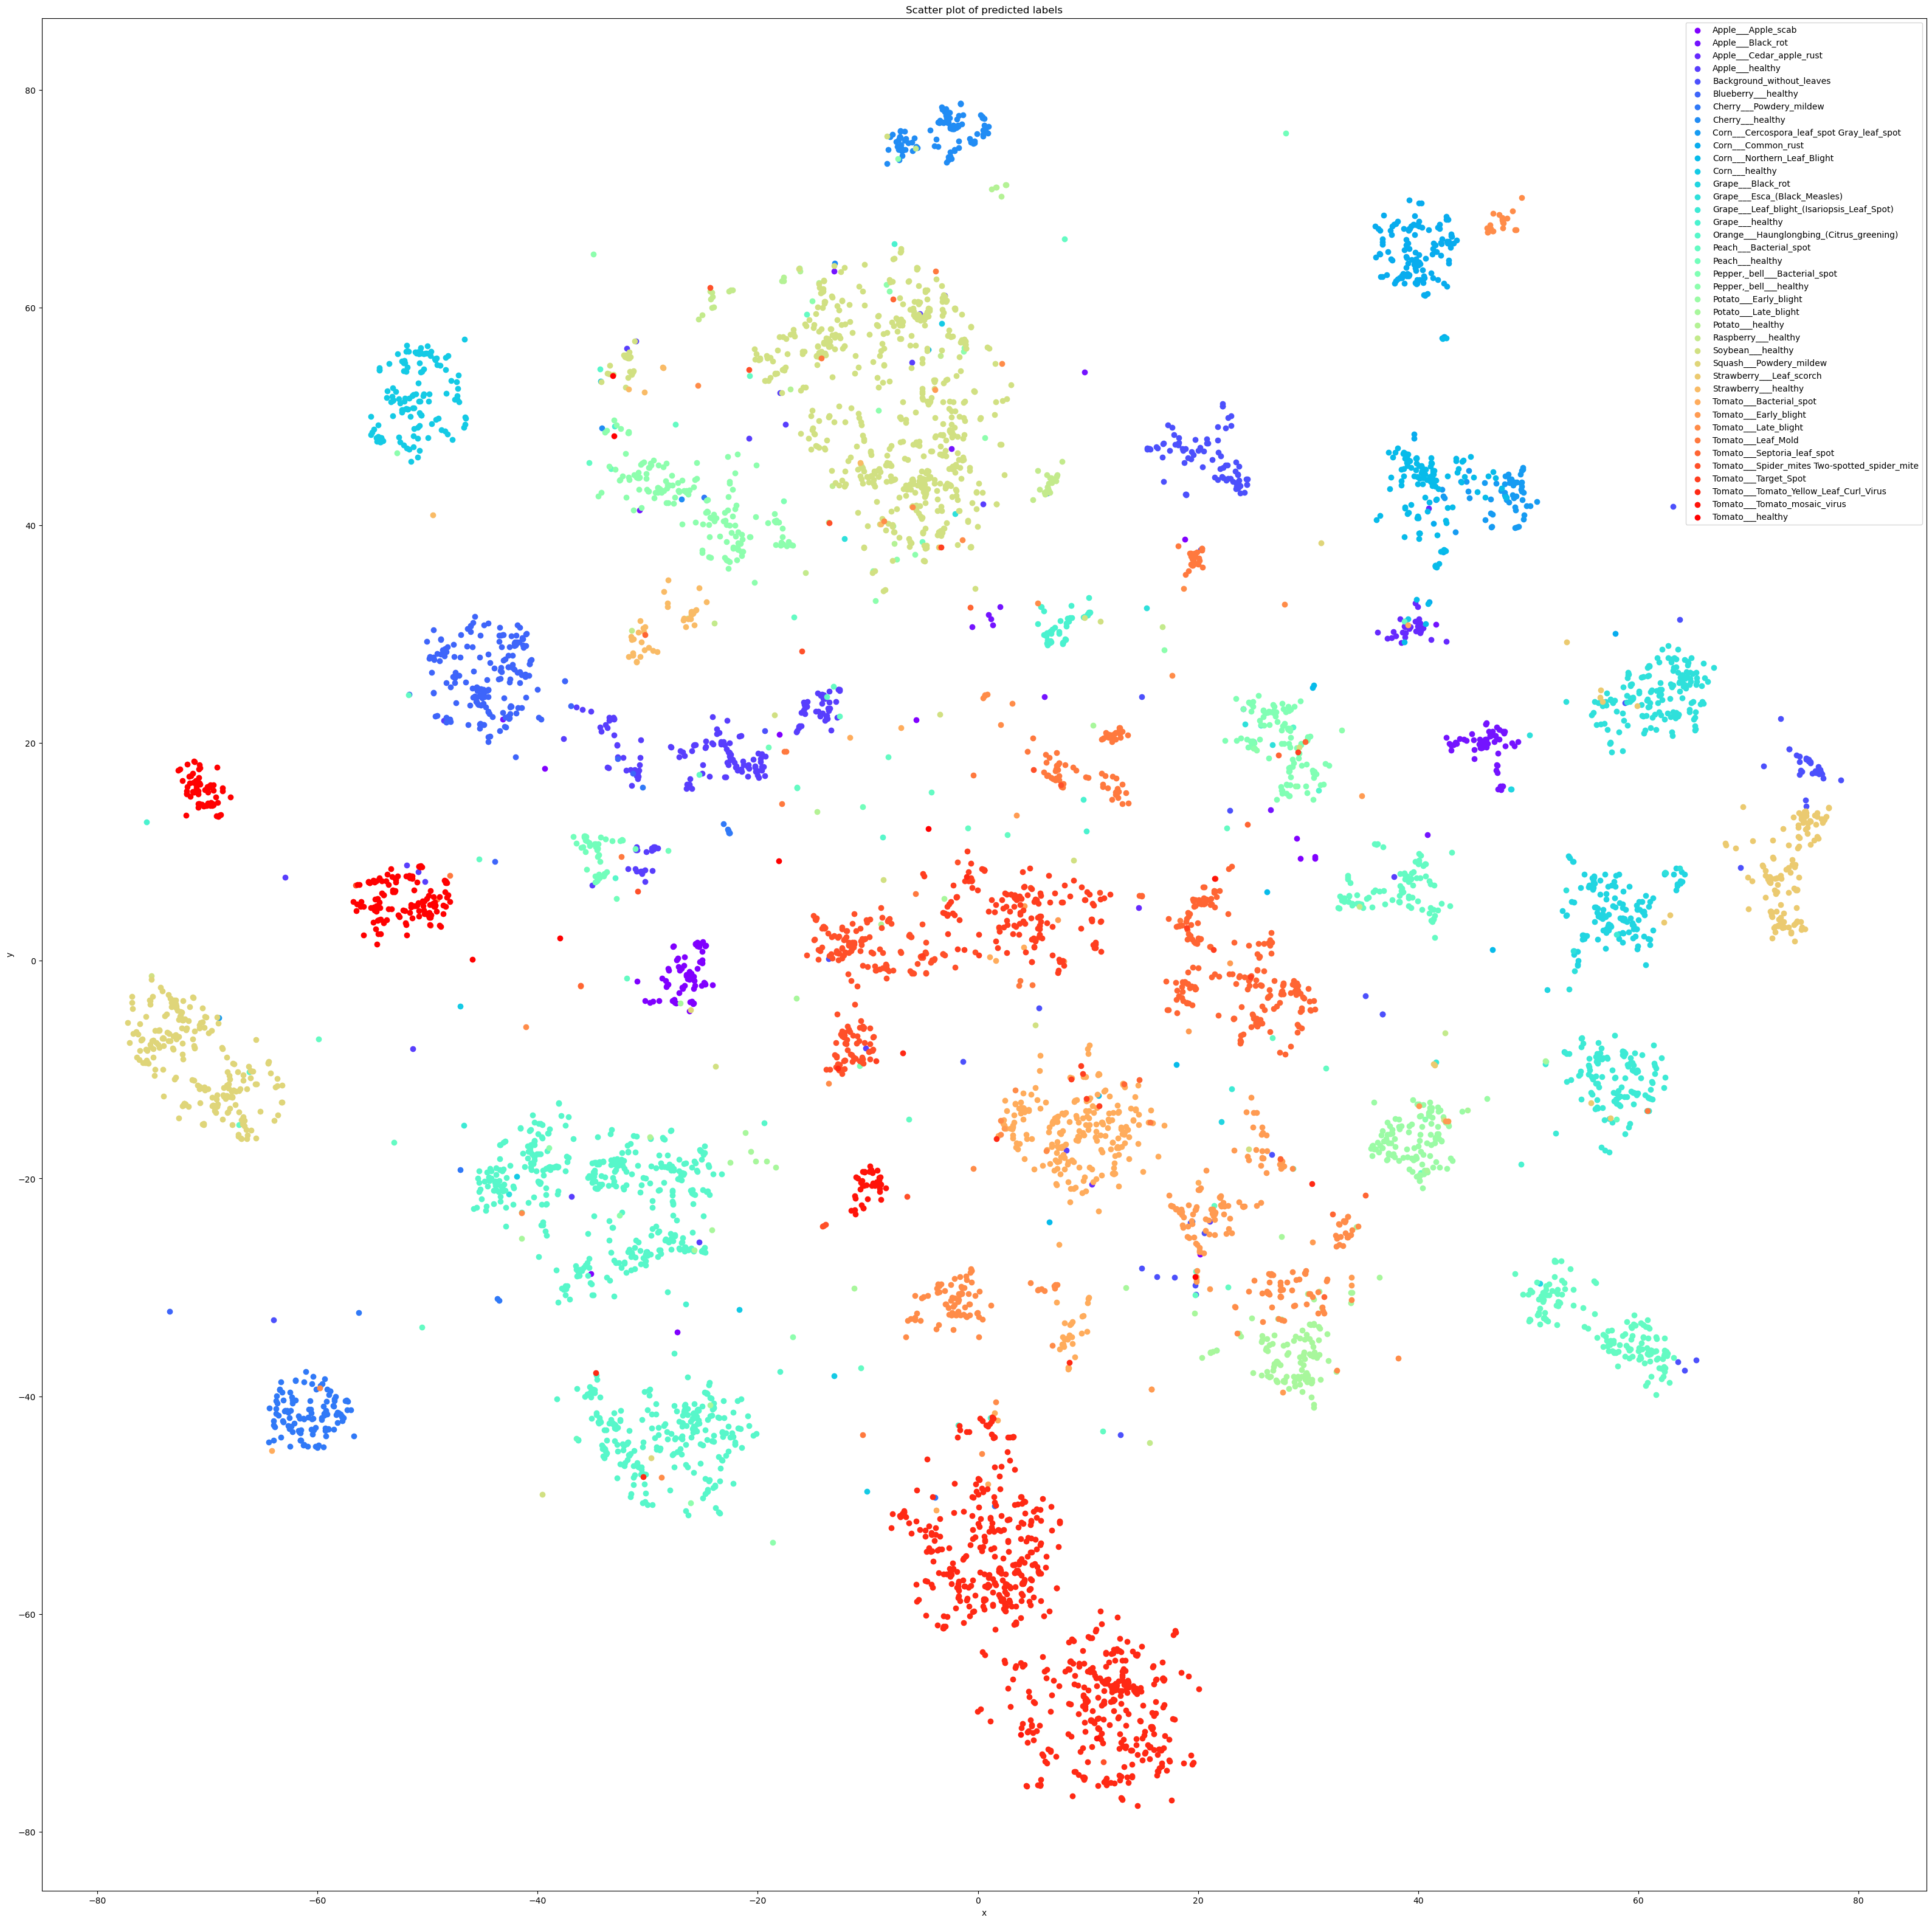

In [6]:
save_scatter_plots("../results/dataframes/batch_0001_.csv", label_mappings)